In [2]:
import sys

!{sys.executable} -m pip install -q gdown
!{sys.executable} -m pip install -q pandas
!{sys.executable} -m pip install -q scikit-learn
!{sys.executable} -m pip install -q rasterio
!{sys.executable} -m pip install -q matplotlib
!{sys.executable} -m pip install -q albumentations
!{sys.executable} -m pip install -q timm 
!{sys.executable} -m pip install -q torch
!{sys.executable} -m pip install -q tqdm 
!{sys.executable} -m pip install -q opendatasets
!{sys.executable} -m pip install -q kaggle
!{sys.executable} -m pip install fastparquet
!pip install kaggle

In [6]:
# import gdown

# # link chia sẻ Google Drive (dạng share link)
# url = "https://drive.google.com/uc?id=1-4FkPgjgqiEFRxpr3Eoh2JLI0nfJMMbw"  # thay FILE_ID bằng id thực tế
# output = "bigearthnet_12band_10m.zip"

# # tải file về
# gdown.download(url, output, quiet=False)

# # giải nén
# import zipfile
# with zipfile.ZipFile(output, 'r') as zip_ref:
#     zip_ref.extractall("./data")  # giải nén vào ./data

Downloading...
From (original): https://drive.google.com/uc?id=1-4FkPgjgqiEFRxpr3Eoh2JLI0nfJMMbw
From (redirected): https://drive.google.com/uc?id=1-4FkPgjgqiEFRxpr3Eoh2JLI0nfJMMbw&confirm=t&uuid=e3c423e5-f18c-47e2-b77d-c728a5915cd5
To: /retrain_vit/bigearthnet_12band_10m.zip
100%|██████████| 14.7G/14.7G [06:49<00:00, 36.0MB/s] 


In [4]:
# !mkdir -p ~/.kaggle
# !cp "kaggle (2).json" ~/.kaggle/kaggle.json
# !chmod 600 ~/.kaggle/kaggle.json

In [10]:
# !kaggle datasets download -d nhanle03/bigearthnet-12band-10m-1

Dataset URL: https://www.kaggle.com/datasets/nhanle03/bigearthnet-12band-10m-1
License(s): apache-2.0
100%|██████████████████████████████████████▉| 14.1G/14.1G [00:28<00:00, 508MB/s]
100%|███████████████████████████████████████| 14.1G/14.1G [00:28<00:00, 538MB/s]


In [13]:
# # giải nén
# import zipfile
# with zipfile.ZipFile("bigearthnet-12band-10m-1.zip", 'r') as zip_ref:
#     zip_ref.extractall("./data")  # giải nén vào ./data

In [21]:
# # Tạo thư mục đích nếu chưa có
# !kaggle datasets download -d immulu/bigearthnetv2-reference-maps

# !mkdir -p ./lable_metadata

# # Giải nén chỉ 1 file: metadata.parquet
# !unzip bigearthnetv2-reference-maps.zip "metadata.parquet" -d ./lable_metadata

Dataset URL: https://www.kaggle.com/datasets/immulu/bigearthnetv2-reference-maps
License(s): Community Data License Agreement - Permissive - Version 1.0
 88%|███████████████████████████████████     | 570M/651M [00:00<00:00, 1.22GB/s]
100%|████████████████████████████████████████| 651M/651M [00:00<00:00, 1.20GB/s]
Archive:  bigearthnetv2-reference-maps.zip
  inflating: ./lable_metadata/metadata.parquet  


In [14]:
# import shutil
# import os

# src = "data/content/bigearthnet_12band_10m_1"
# dst = "data/content/bigearthnet_12band_10m"

# # Di chuyển toàn bộ file từ src sang dst
# for file_name in os.listdir(src):
#     shutil.move(os.path.join(src, file_name), dst)

# # (Tuỳ chọn) Xoá thư mục rỗng
# os.rmdir(src)

In [15]:
# example_file = os.path.join(dst, "S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP",
#                             "S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_26_57_12band.tif")

# print("Tồn tại file:", os.path.exists(example_file))

Tồn tại file: True


In [7]:
import pandas as pd

# Đường dẫn đến file metadata.parquet đã giải nén
parquet_path = './lable_metadata/metadata.parquet'

# Đọc file parquet
df = pd.read_parquet(parquet_path)

print(df.columns)

Index(['patch_id', 'labels', 'split', 'country', 's1_name', 's2v1_name',
       'contains_seasonal_snow', 'contains_cloud_or_shadow'],
      dtype='object')


In [8]:
df["labels"][15]

['Arable land',
 'Broad-leaved forest',
 'Inland waters',
 'Pastures',
 'Urban fabric']

In [9]:
from collections import Counter
from itertools import chain

# Chuỗi các nhãn được gộp thành 1 danh sách lớn (flattened list)
all_labels = list(chain.from_iterable(df['labels']))

# Đếm tần suất xuất hiện của từng nhãn
label_counts = Counter(all_labels)

# In ra số nhãn duy nhất
print("Số lượng nhãn duy nhất:", len(label_counts))

# In ra danh sách và số lần xuất hiện
print("\nTần suất xuất hiện của từng nhãn:")
for label, count in label_counts.most_common():
    print(f"{label:40s}: {count}")


Số lượng nhãn duy nhất: 19

Tần suất xuất hiện của từng nhãn:
Arable land                             : 188025
Mixed forest                            : 165780
Coniferous forest                       : 154941
Transitional woodland, shrub            : 141150
Broad-leaved forest                     : 135928
Land principally occupied by agriculture, with significant areas of natural vegetation: 122709
Complex cultivation patterns            : 99598
Pastures                                : 95605
Urban fabric                            : 63758
Inland waters                           : 63212
Marine waters                           : 61832
Agro-forestry areas                     : 33181
Permanent crops                         : 29588
Inland wetlands                         : 20919
Moors, heathland and sclerophyllous vegetation: 13894
Natural grassland and sparsely vegetated areas: 11882
Industrial or commercial units          : 11142
Coastal wetlands                        : 1397
Beaches, du

In [10]:
import pandas as pd
import numpy as np

# Đọc file metadata.parquet
parquet_path = './lable_metadata/metadata.parquet'
df = pd.read_parquet(parquet_path)

# Danh sách 19 lớp chuẩn
class_list = [
    'Arable land',
    'Mixed forest',
    'Coniferous forest',
    'Transitional woodland, shrub',
    'Broad-leaved forest',
    'Land principally occupied by agriculture, with significant areas of natural vegetation',
    'Complex cultivation patterns',
    'Pastures',
    'Urban fabric',
    'Inland waters',
    'Marine waters',
    'Agro-forestry areas',
    'Permanent crops',
    'Inland wetlands',
    'Moors, heathland and sclerophyllous vegetation',
    'Natural grassland and sparsely vegetated areas',
    'Industrial or commercial units',
    'Coastal wetlands',
    'Beaches, dunes, sands'
]

# Tạo ánh xạ từ tên nhãn sang chỉ số
label_to_idx = {label: i for i, label in enumerate(class_list)}

# Hàm chuyển danh sách nhãn thành vector 19 chiều
def encode_labels(label_list):
    vec = np.zeros(len(class_list), dtype=int)
    for label in label_list:
        if label in label_to_idx:
            vec[label_to_idx[label]] = 1
    return vec.tolist()

# Ghi đè cột 'labels' bằng vector 19 chiều (multi-hot)
df['labels'] = df['labels'].apply(encode_labels)

# Kiểm tra kết quả
print(df.head())

# (Tùy chọn) Lưu lại file parquet hoặc CSV
df.to_parquet('metadata_multilabel_encoded.parquet')


                                            patch_id  \
0  S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_2...   
1  S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_2...   
2  S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_2...   
3  S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_2...   
4  S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_2...   

                                              labels split  country  \
0  [1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...  test  Austria   
1  [1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...  test  Austria   
2  [1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...  test  Austria   
3  [0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, ...  test  Austria   
4  [0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, ...  test  Austria   

                                        s1_name  \
0  S1B_IW_GRDH_1SDV_20170612T165809_33UUP_26_57   
1  S1B_IW_GRDH_1SDV_20170612T165809_33UUP_27_55   
2  S1B_IW_GRDH_1SDV_20170612T165809_33UUP_27_56   
3  S1B_IW_GRDH_1SDV_20170612T165

In [11]:
df['labels']

0         [1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...
1         [1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...
2         [1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...
3         [0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, ...
4         [0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, ...
                                ...                        
480033    [0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
480034    [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
480035    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
480036    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
480037    [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: labels, Length: 480038, dtype: object

In [12]:
import os

# Đường dẫn thư mục chứa ảnh đa phổ đã xử lý
data_dir = "data/content/bigearthnet_12band_10m"

class_counts = {}
total_images = 0

for label in sorted(os.listdir(data_dir)):
    class_path = os.path.join(data_dir, label)
    if os.path.isdir(class_path):
        n_files = len([f for f in os.listdir(class_path) if f.endswith('.tif')])
        class_counts[label] = n_files
        total_images += n_files

# In kết quả
print("Số lượng ảnh mỗi class:")
for label, count in class_counts.items():
    print(f"Class {label}: {count} ảnh")

print(f"\nTổng số ảnh: {total_images}")

Số lượng ảnh mỗi class:
Class S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP: 3305 ảnh
Class S2A_MSIL2A_20170613T101031_N9999_R022_T34VER: 6686 ảnh
Class S2A_MSIL2A_20170617T113321_N9999_R080_T29UPU: 7986 ảnh
Class S2A_MSIL2A_20170701T093031_N9999_R136_T35VPK: 7997 ảnh
Class S2A_MSIL2A_20170704T112111_N9999_R037_T29SND: 8216 ảnh
Class S2A_MSIL2A_20170717T113321_N9999_R080_T29UPA: 370 ảnh
Class S2A_MSIL2A_20170717T113321_N9999_R080_T29UPV: 6013 ảnh
Class S2A_MSIL2A_20170720T100031_N9999_R122_T34UDG: 1540 ảnh
Class S2A_MSIL2A_20170803T094031_N9999_R036_T34TCR: 4864 ảnh
Class S2A_MSIL2A_20170813T112121_N9999_R037_T29SNC: 8222 ảnh
Class S2A_MSIL2A_20170818T103021_N9999_R108_T32TMT: 4888 ảnh
Class S2A_MSIL2A_20170905T095031_N9999_R079_T35VNL: 8229 ảnh
Class S2A_MSIL2A_20170905T095031_N9999_R079_T35WPN: 2292 ảnh
Class S2A_MSIL2A_20171002T094031_N9999_R036_T34TCR: 4864 ảnh
Class S2A_MSIL2A_20171002T094031_N9999_R036_T34TCS: 627 ảnh
Class S2A_MSIL2A_20171002T112111_N9999_R037_T29SNB: 8165 ảnh
Cl

In [13]:
df['labels']

0         [1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...
1         [1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...
2         [1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...
3         [0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, ...
4         [0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, ...
                                ...                        
480033    [0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
480034    [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
480035    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
480036    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
480037    [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: labels, Length: 480038, dtype: object

Shape của ảnh S2A_MSIL2A_20170818T103021_N9999_R108_T32TMT_56_71_12band.tif: (12, 120, 120) (channels, height, width)


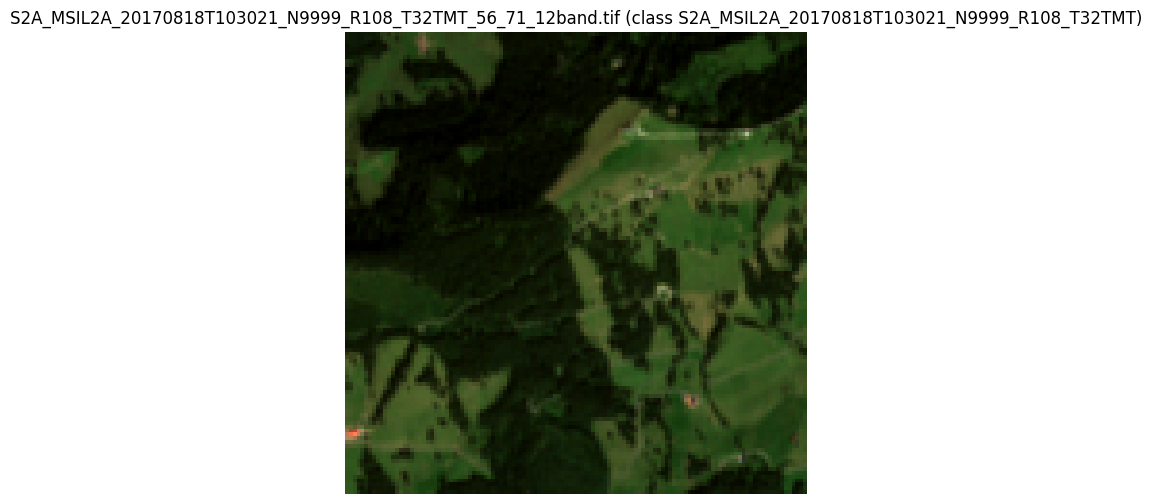

In [14]:
import numpy as np
import rasterio
import matplotlib.pyplot as plt
import random

# Chọn ngẫu nhiên 1 class và 1 ảnh trong class
random_class = random.choice(os.listdir(data_dir))
img_path = os.path.join(data_dir, random_class)
random_img = random.choice([f for f in os.listdir(img_path) if f.endswith('.tif')])
img_full_path = os.path.join(img_path, random_img)

# Đọc ảnh
with rasterio.open(img_full_path) as src:
    img = src.read()  # shape: (12, H, W)

# In shape
print(f"Shape của ảnh {random_img}: {img.shape} (channels, height, width)")

# Hiển thị ảnh (dùng band 4,3,2 tương ứng RGB)
rgb = np.stack([img[3], img[2], img[1]], axis=-1)  # Chú ý chỉ số bắt đầu từ 0
rgb = rgb.astype(np.float32)
rgb /= np.max(rgb) + 1e-6  # Chuẩn hóa để hiển thị

plt.figure(figsize=(6, 6))
plt.imshow(rgb)
plt.title(f"{random_img} (class {random_class})")
plt.axis('off')
plt.show()


In [15]:
df['labels']

0         [1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...
1         [1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...
2         [1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...
3         [0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, ...
4         [0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, ...
                                ...                        
480033    [0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
480034    [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
480035    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
480036    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
480037    [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: labels, Length: 480038, dtype: object

In [16]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from glob import glob

# 1. Đường dẫn gốc chứa các thư mục con
IMAGE_DIR = "data/content/bigearthnet_12band_10m"

# 2. Đọc metadata chứa patch_id và labels
# df = pd.read_parquet("./lable_metadata/metadata.parquet")

# 3. Duyệt toàn bộ ảnh trong thư mục con, tạo ánh xạ patch_id → đường dẫn ảnh
tif_paths = glob(os.path.join(IMAGE_DIR, "*", "*_12band.tif"))

patch_to_path = {
    os.path.basename(path).replace("_12band.tif", ""): path
    for path in tif_paths
}

# 4. Giữ lại các patch_id có ảnh thật sự
df = df[df['patch_id'].isin(patch_to_path)]

# 5. Gán cột image_path theo ánh xạ tìm được
df['image_path'] = df['patch_id'].map(patch_to_path)

# 6. Chia ngẫu nhiên train/val/test (70/15/15)
train_val_df, test_df = train_test_split(df, test_size=0.15, random_state=42, shuffle=True)
train_df, val_df = train_test_split(train_val_df, test_size=0.1765, random_state=42)

# 7. Tạo danh sách (image_path, labels)
train_list = list(zip(train_df['image_path'], train_df['labels']))
val_list = list(zip(val_df['image_path'], val_df['labels']))
test_list = list(zip(test_df['image_path'], test_df['labels']))

# 8. In kết quả
print(f"Số ảnh train: {len(train_list)}")
print(f"Số ảnh val:   {len(val_list)}")
print(f"Số ảnh test:  {len(test_list)}")

df.head()

Số ảnh train: 71741
Số ảnh val:   15377
Số ảnh test:  15374


,patch_id,labels,split,country,s1_name,s2v1_name,contains_seasonal_snow,contains_cloud_or_shadow,image_path
0,S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_2...,"[1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...",test,Austria,S1B_IW_GRDH_1SDV_20170612T165809_33UUP_26_57,S2A_MSIL2A_20170613T101031_26_57,False,False,data/content/bigearthnet_12band_10m/S2A_MSIL2A...
1,S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_2...,"[1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",test,Austria,S1B_IW_GRDH_1SDV_20170612T165809_33UUP_27_55,S2A_MSIL2A_20170613T101031_27_55,False,False,data/content/bigearthnet_12band_10m/S2A_MSIL2A...
2,S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_2...,"[1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",test,Austria,S1B_IW_GRDH_1SDV_20170612T165809_33UUP_27_56,S2A_MSIL2A_20170613T101031_27_56,False,False,data/content/bigearthnet_12band_10m/S2A_MSIL2A...
3,S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_2...,"[0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, ...",test,Austria,S1B_IW_GRDH_1SDV_20170612T165809_33UUP_27_57,S2A_MSIL2A_20170613T101031_27_57,False,False,data/content/bigearthnet_12band_10m/S2A_MSIL2A...
4,S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_2...,"[0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, ...",test,Austria,S1B_IW_GRDH_1SDV_20170612T165809_33UUP_27_58,S2A_MSIL2A_20170613T101031_27_58,False,False,data/content/bigearthnet_12band_10m/S2A_MSIL2A...


In [17]:
train_list[0]

('data/content/bigearthnet_12band_10m/S2A_MSIL2A_20170803T094031_N9999_R036_T34TCR/S2A_MSIL2A_20170803T094031_N9999_R036_T34TCR_64_29_12band.tif',
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [18]:
# Kiểm tra những ảnh KHÔNG có trong metadata
tif_patch_ids = set([os.path.basename(p).replace('_12band.tif', '') for p in tif_paths])
metadata_patch_ids = set(df['patch_id'].tolist())

missing_from_metadata = tif_patch_ids - metadata_patch_ids
print(f"Số ảnh KHÔNG có metadata: {len(missing_from_metadata)}")


Số ảnh KHÔNG có metadata: 9718


In [19]:
# Số ảnh thực sự trong thư mục
print("Tổng số file ảnh .tif:", len(tif_paths))

# Số patch_id có metadata
print("Tổng số patch_id trong metadata:", len(df))

# Số ảnh tồn tại đồng thời cả trong thư mục và metadata
common_ids = set(df['patch_id']).intersection(set(patch_to_path))
print("Số patch_id khớp được cả metadata và ảnh:", len(common_ids))


Tổng số file ảnh .tif: 112210
Tổng số patch_id trong metadata: 102492
Số patch_id khớp được cả metadata và ảnh: 102492


In [20]:
import os
from glob import glob

# 1. Đường dẫn thư mục ảnh
IMAGE_DIR = "data/content/bigearthnet_12band_10m"

# 2. Lấy tất cả file .tif (ảnh 12 band) trong mọi thư mục con
tif_paths = glob(os.path.join(IMAGE_DIR, "*", "*_12band.tif"))

# 3. Lấy patch_id từ tên file
tif_patch_ids = set(os.path.basename(p).replace('_12band.tif', '') for p in tif_paths)

# 4. Lấy patch_id từ metadata
import pandas as pd
df = pd.read_parquet("./lable_metadata/metadata.parquet")
metadata_patch_ids = set(df['patch_id'].tolist())

# 5. Tìm ảnh bị thiếu trong metadata
missing_patch_ids = tif_patch_ids - metadata_patch_ids

# 6. In số lượng và một vài ví dụ
print(f"Số ảnh .tif không có metadata: {len(missing_patch_ids)}")
print("Ví dụ các ảnh bị thiếu:")
for pid in list(missing_patch_ids)[:10]:
    print(f"- {pid}_12band.tif")


Số ảnh .tif không có metadata: 9718
Ví dụ các ảnh bị thiếu:
- S2A_MSIL2A_20171101T094131_N9999_R036_T35VNK_35_79_12band.tif
- S2A_MSIL2A_20170701T093031_N9999_R136_T35VPK_63_70_12band.tif
- S2A_MSIL2A_20170905T095031_N9999_R079_T35VNL_81_89_12band.tif
- S2A_MSIL2A_20170905T095031_N9999_R079_T35VNL_76_64_12band.tif
- S2A_MSIL2A_20171101T094131_N9999_R036_T35VNJ_77_87_12band.tif
- S2A_MSIL2A_20171101T094131_N9999_R036_T35VNJ_46_69_12band.tif
- S2A_MSIL2A_20171101T094131_N9999_R036_T35VNK_01_27_12band.tif
- S2A_MSIL2A_20171101T094131_N9999_R036_T35VNK_41_87_12band.tif
- S2A_MSIL2A_20171101T094131_N9999_R036_T35VNJ_26_31_12band.tif
- S2A_MSIL2A_20171101T094131_N9999_R036_T35VNK_76_61_12band.tif


In [21]:
import albumentations as A
from albumentations.pytorch import ToTensorV2

train_transform = A.Compose([
    A.Resize(224, 224),
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.5),
    A.RandomRotate90(p=0.5),
    A.ShiftScaleRotate(shift_limit=0.1, scale_limit=0.1, rotate_limit=15, p=0.5),
    A.Normalize(mean=0.0, std=1.0, max_pixel_value=1.0),
    ToTensorV2(transpose_mask=True),
])

val_transform = A.Compose([
    A.Resize(224, 224),
    A.Normalize(mean=[0]*12, std=[1]*12, max_pixel_value=1.0),
    ToTensorV2(transpose_mask=False)
])


/venv/main/lib/python3.12/site-packages/albumentations/core/validation.py:114: UserWarning: ShiftScaleRotate is a special case of Affine transform. Please use Affine transform instead.
  original_init(self, **validated_kwargs)


In [35]:
from torch.utils.data import Dataset
import torch
import numpy as np
import rasterio  # dùng rasterio chứ không cần tifffile nếu bạn dùng .open()

class BigEarthNetDataset(Dataset):
    def __init__(self, data_list, transform=None):
        self.data_list = data_list  # List of (img_path, label_list)
        self.transform = transform

    def __len__(self):
        return len(self.data_list)

    def __getitem__(self, idx):
        img_path, label = self.data_list[idx]

        with rasterio.open(img_path) as src:
            image = src.read()  # (12, H, W) hoặc (13, H, W)

        # Giữ lại 3 bands
        bands_to_keep = [i for i in range(image.shape[0]) if i not in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]]
        # bands_to_keep = [i for i in range(image.shape[0]) if i not in []]
        image = image[bands_to_keep, :, :]

        image = image.astype(np.float32) / 10000.0
        image = np.transpose(image, (1, 2, 0))  # (H, W, C)


        if self.transform:
            augmented = self.transform(image=image)
            image = augmented['image']
        else:
            image = torch.tensor(np.transpose(image, (2, 0, 1)), dtype=torch.float32)

        # Chuyển label thành Tensor float cho multi-label
        label = torch.tensor(label, dtype=torch.float32)

        return image, label

In [36]:
from torch.utils.data import DataLoader

# Batch size
BATCH_SIZE = 128

# Dataset
train_dataset = BigEarthNetDataset(train_list, transform=train_transform)
val_dataset = BigEarthNetDataset(val_list, transform=val_transform)
test_dataset = BigEarthNetDataset(test_list, transform=val_transform)

# DataLoader
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=8, pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

In [37]:
train_dataset[0][1].shape

torch.Size([19])

Label Tensor: tensor([1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.])
Shape: torch.Size([19])
Non-zero class indices: [0, 4, 6]
Non-zero class count: 3.0


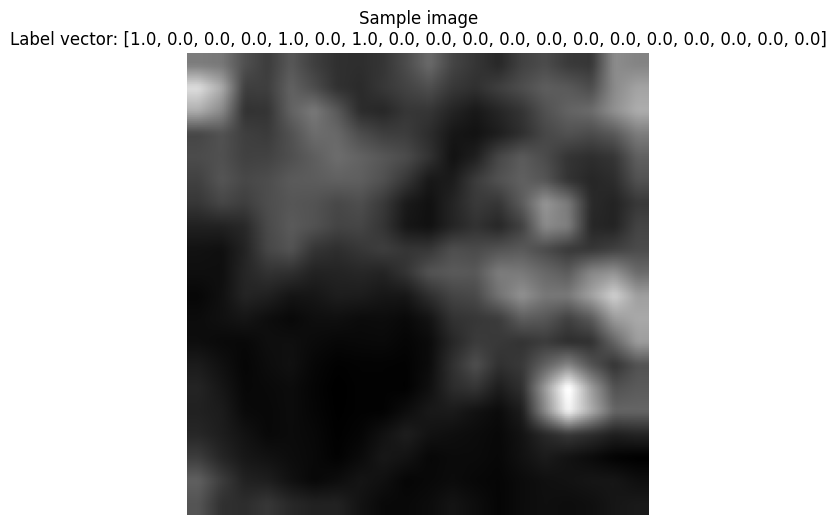

In [38]:
# Lấy 1 mẫu bất kỳ từ train_dataset
sample_img, sample_label = train_dataset[3]

# Kiểm tra thông tin label
print("Label Tensor:", sample_label)
print("Shape:", sample_label.shape)
print("Non-zero class indices:", torch.nonzero(sample_label).squeeze().tolist())
print("Non-zero class count:", torch.sum(sample_label).item())

# Chuyển tensor về numpy để hiển thị
sample_img_np = sample_img.numpy().transpose(1, 2, 0)  # (H, W, C)

# Lấy lại các band RGB (band 4, 3, 2 --> index 3, 2, 1)
rgb = sample_img_np[:, :, [0, 0, 0]]

# Chuẩn hóa về [0, 1] nếu cần (nếu bạn đã normalize thì giá trị có thể lệch)
rgb = (rgb - rgb.min()) / (rgb.max() - rgb.min() + 1e-6)

# Hiển thị ảnh
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6))
plt.imshow(rgb)
plt.title(f"Sample image\nLabel vector: {sample_label.tolist()}")
plt.axis("off")
plt.show()


VIT

In [39]:
import timm
import torch.nn as nn
import torch

# Load ViT Hybrid pretrained
model = timm.create_model("vit_base_r50_s16_224", pretrained=True)

# Giữ Conv2d đầu tiên với 3 kênh input
old_conv = model.patch_embed.backbone.stem[0]
new_conv = nn.Conv2d(
    in_channels=1,
    out_channels=old_conv.out_channels,
    kernel_size=old_conv.kernel_size,
    stride=old_conv.stride,
    padding=old_conv.padding,
    bias=False
)

# with torch.no_grad():
#     old_weight = old_conv.weight  # (out_c, 3, kH, kW)
#     # Lặp 3 lần theo chiều channel để thành 9
#     new_weight = old_weight.repeat(1, 3, 1, 1) / 3.0
#     new_conv.weight[:, :9, :, :] = new_weight[:, :9, :, :]
with torch.no_grad():
    # Lấy weight cũ (3 channel)
    old_weight = old_conv.weight  # shape: (out_c, 3, kH, kW)
    new_weight = old_weight.mean(dim=1, keepdim=True)  # (out_c, 1, kH, kW)
    new_conv.weight[:, :1, :, :] = new_weight

model.patch_embed.backbone.stem[0] = new_conv

# Thay thế head cho 19 nhãn multi-label
num_features = model.num_features
model.head = nn.Sequential(
    nn.Linear(num_features, 19),
    nn.Sigmoid()
)

# Đưa model lên GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

print("ViT Hybrid fixed: 3-band input, 19-class output (pretrained weights kept).")

ViT Hybrid fixed: 3-band input, 19-class output (pretrained weights kept).


In [40]:
import torch.optim as optim

# Loss cho multi-label classification
criterion = nn.BCELoss()

# Optimizer (AdamW thường dùng với ViT)
optimizer = optim.AdamW(model.parameters(), lr=2e-4, weight_decay=1e-4)

# Optional: Learning rate scheduler
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)


In [41]:
class EarlyStopping:
    def __init__(self, save_path, patience=3, delta=0):
        """
        patience: số epoch không cải thiện trước khi dừng
        delta: mức cải thiện tối thiểu được coi là tốt hơn
        save_path: nơi lưu model tốt nhất
        """
        self.patience = patience
        self.delta = delta
        self.save_path = save_path
        self.counter = 0
        self.best_score = None
        self.early_stop = False

    def __call__(self, val_loss, model):
        score = -val_loss  # vì nhỏ hơn là tốt hơn

        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
        elif score < self.best_score + self.delta:
            self.counter += 1
            print(f"🔴 EarlyStopping counter: {self.counter}/{self.patience}")
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
            self.counter = 0  # reset counter

    def save_checkpoint(self, val_loss, model):
        torch.save(model, self.save_path)
        print(f"✅ Saved best model (val_loss={val_loss:.4f})")


In [42]:
from tqdm import tqdm

def train_one_epoch(model, dataloader, optimizer, criterion, device):
    model.train()
    total_loss = 0

    for batch_idx, (images, labels) in enumerate(tqdm(dataloader, desc="Training", unit="batch")):
        images = images.to(device)
        labels = torch.tensor(labels, dtype=torch.float32).to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    return total_loss / len(dataloader)


def validate(model, dataloader, criterion, device):
    model.eval()
    total_loss = 0
    all_preds, all_labels = [], []

    with torch.no_grad():
        for batch_idx, (images, labels) in enumerate(tqdm(dataloader, desc="Validating", unit="batch")):
            images = images.to(device)
            labels = torch.tensor(labels, dtype=torch.float32).to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)

            total_loss += loss.item()
            all_preds.append(outputs.cpu())
            all_labels.append(labels.cpu())

    return total_loss / len(dataloader)


In [43]:
sample_img, sample_label = train_dataset[0]
print(f"Type image: {type(sample_img)}, shape: {getattr(sample_img, 'shape', None)}, dtype: {getattr(sample_img, 'dtype', None)}")
print(f"Type label: {type(sample_label)}, shape: {getattr(sample_label, 'shape', None)}, dtype: {getattr(sample_label, 'dtype', None)}")


Type image: <class 'torch.Tensor'>, shape: torch.Size([1, 224, 224]), dtype: torch.float32
Type label: <class 'torch.Tensor'>, shape: torch.Size([19]), dtype: torch.float32


In [44]:
import gc

early_stopping = EarlyStopping(save_path="my_pytorch_model_bigearth_1_keepB1.pth", patience=3, delta=0.001)

NUM_EPOCHS = 10
device = "cuda" if torch.cuda.is_available() else "cpu"

for epoch in range(NUM_EPOCHS):
    train_loss = train_one_epoch(model, train_loader, optimizer, criterion, device)
    val_loss = validate(model, val_loader, criterion, device)

    scheduler.step()

    print(f"Epoch {epoch+1}/{NUM_EPOCHS}: Train Loss = {train_loss:.4f}, Val Loss = {val_loss:.4f}")

    early_stopping(val_loss, model)

    # Giải phóng bộ nhớ
    torch.cuda.empty_cache()
    gc.collect()

    if early_stopping.early_stop:
        print("🛑 Early stopping triggered!")
        break


Training:   0%|          | 0/561 [00:00<?, ?batch/s]/tmp/ipykernel_5218/1265811921.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(labels, dtype=torch.float32).to(device)
Validating:   0%|          | 0/121 [00:00<?, ?batch/s]/tmp/ipykernel_5218/1265811921.py:30: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(labels, dtype=torch.float32).to(device)
Validating: 100%|██████████| 121/121 [01:10<00:00,  1.71batch/s]


Epoch 1/10: Train Loss = 0.2510, Val Loss = 0.2449
✅ Saved best model (val_loss=0.2449)


Validating: 100%|██████████| 121/121 [01:26<00:00,  1.40batch/s]


Epoch 2/10: Train Loss = 0.2246, Val Loss = 0.2212
✅ Saved best model (val_loss=0.2212)


Validating: 100%|██████████| 121/121 [01:28<00:00,  1.37batch/s]


Epoch 3/10: Train Loss = 0.2163, Val Loss = 0.2105
✅ Saved best model (val_loss=0.2105)


Validating: 100%|██████████| 121/121 [01:25<00:00,  1.41batch/s]


Epoch 4/10: Train Loss = 0.2108, Val Loss = 0.2071
✅ Saved best model (val_loss=0.2071)


Validating: 100%|██████████| 121/121 [01:22<00:00,  1.46batch/s]


Epoch 5/10: Train Loss = 0.2065, Val Loss = 0.2089
🔴 EarlyStopping counter: 1/3


Validating: 100%|██████████| 121/121 [01:27<00:00,  1.38batch/s]


Epoch 6/10: Train Loss = 0.1925, Val Loss = 0.1973
✅ Saved best model (val_loss=0.1973)


Validating: 100%|██████████| 121/121 [01:25<00:00,  1.42batch/s]


Epoch 7/10: Train Loss = 0.1872, Val Loss = 0.1976
🔴 EarlyStopping counter: 1/3


Validating: 100%|██████████| 121/121 [01:20<00:00,  1.50batch/s]


Epoch 8/10: Train Loss = 0.1809, Val Loss = 0.1967
🔴 EarlyStopping counter: 2/3


Validating: 100%|██████████| 121/121 [01:25<00:00,  1.42batch/s]


Epoch 9/10: Train Loss = 0.1728, Val Loss = 0.1973
🔴 EarlyStopping counter: 3/3
🛑 Early stopping triggered!


In [45]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("⚡ Using device:", device)

model_path = "my_pytorch_model_bigearth_1_keepB1.pth"
model = torch.load(model_path, map_location=device, weights_only=False)
model.eval()
model.to(device)

random_image = torch.rand((1, 224, 224), dtype=torch.float32, device=device)

with torch.no_grad():
    output = model(random_image.unsqueeze(0))
    predicted = (output.squeeze() > 0.5).cpu().numpy()

print("Output sigmoid:\n", output.squeeze().cpu().numpy())
print("Predicted Labels:\n", predicted)


⚡ Using device: cuda
Output sigmoid:
 [1.7513823e-02 9.8774256e-03 5.2927595e-02 9.8963445e-03 1.6225275e-03
 3.4095806e-03 4.8111173e-04 8.1041479e-04 1.5781457e-03 7.2169429e-01
 1.3920735e-02 3.2511426e-04 3.5041905e-04 9.4577810e-04 6.1951403e-05
 3.6569309e-05 6.1401154e-04 2.7362688e-05 3.9477807e-05]
Predicted Labels:
 [False False False False False False False False False  True False False
 False False False False False False False]


In [46]:
from sklearn.metrics import (
    classification_report, multilabel_confusion_matrix, roc_auc_score,
    precision_recall_fscore_support, average_precision_score
)
import numpy as np

# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# model_path = "/content/drive/MyDrive/my_pytorch_model_bigearth_1_class0_removeB1B2B6.pth"
# model = torch.load(model_path, map_location=device, weights_only=False)
# model = model.to(device)

def evaluate(model, dataloader, device, threshold=0.5):
    model.eval()
    all_preds, all_labels = [], []

    with torch.no_grad():
        for images, labels in dataloader:
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)
            preds = (outputs > threshold).float()

            # all_preds.append(preds.cpu().numpy())
            all_preds.append(outputs.cpu().numpy())  # không threshold
            all_labels.append(labels.cpu().numpy())

    all_preds = np.vstack(all_preds)
    all_labels = np.vstack(all_labels)

    return all_preds, all_labels


# Run evaluation
preds, true_labels = evaluate(model, test_loader, device)

# Tính mAP (mean average precision)
# mAP = average_precision_score(true_labels, preds, average='macro')
mAP = average_precision_score(true_labels, preds, average='macro')

# Apply threshold
threshold = 0.5
preds = (preds >= threshold).astype(int)

# Tính Precision, Recall, F1 cho từng class
precision, recall, f1, _ = precision_recall_fscore_support(
    true_labels, preds, average=None, zero_division=0
)

# Tính macro average
macro_precision, macro_recall, macro_f1, _ = precision_recall_fscore_support(
    true_labels, preds, average='macro', zero_division=0
)

# Tính micro average
micro_precision, micro_recall, micro_f1, _ = precision_recall_fscore_support(
    true_labels, preds, average='micro', zero_division=0
)

print("Macro Precision: {:.6f}, Recall: {:.6f}, F1: {:.6f}".format(
    macro_precision, macro_recall, macro_f1))
print("Micro Precision: {:.6f}, Recall: {:.6f}, F1: {:.6f}".format(
    micro_precision, micro_recall, micro_f1))

print(f"mAP (macro): {mAP:.6f}")

# Classification report cho từng class
class_names = class_list  # lấy từ đoạn code bạn có trước đó
print("\n Classification Report:")
print(classification_report(
    true_labels, preds,
    target_names=class_names,
    zero_division=0,
    digits=6
))


Macro Precision: 0.759637, Recall: 0.443250, F1: 0.520918
Micro Precision: 0.787324, Recall: 0.580129, F1: 0.668030
mAP (macro): 0.629236

 Classification Report:
                                                                                        precision    recall  f1-score   support

                                                                           Arable land   0.872027  0.717280  0.787120      6441
                                                                          Mixed forest   0.815903  0.715485  0.762402      5005
                                                                     Coniferous forest   0.856804  0.792698  0.823505      5012
                                                          Transitional woodland, shrub   0.611098  0.570552  0.590129      4401
                                                                   Broad-leaved forest   0.641649  0.517459  0.572901      3007
Land principally occupied by agriculture, with significant areas of 

In [47]:
def exclude_number(x):
    if not (0 <= x <= 11):
        raise ValueError("Số phải nằm trong khoảng 0-11")
    return [i for i in range(12) if i != x]

def train(band_idx):    
    from torch.utils.data import Dataset
    import torch
    import numpy as np
    import rasterio  # dùng rasterio chứ không cần tifffile nếu bạn dùng .open()

    filename = "my_pytorch_model_bigearth_1_keepB" + str(band_idx+1) + ".pth"
    
    class BigEarthNetDataset(Dataset):
        def __init__(self, data_list, transform=None):
            self.data_list = data_list  # List of (img_path, label_list)
            self.transform = transform
    
        def __len__(self):
            return len(self.data_list)
    
        def __getitem__(self, idx):
            img_path, label = self.data_list[idx]
    
            with rasterio.open(img_path) as src:
                image = src.read()  # (12, H, W) hoặc (13, H, W)
    
            # Giữ lại 3 bands
            bands_to_keep = [i for i in range(image.shape[0]) if i not in exclude_number(band_idx)]
            # bands_to_keep = [i for i in range(image.shape[0]) if i not in []]
            image = image[bands_to_keep, :, :]
    
            image = image.astype(np.float32) / 10000.0
            image = np.transpose(image, (1, 2, 0))  # (H, W, C)
    
    
            if self.transform:
                augmented = self.transform(image=image)
                image = augmented['image']
            else:
                image = torch.tensor(np.transpose(image, (2, 0, 1)), dtype=torch.float32)
    
            # Chuyển label thành Tensor float cho multi-label
            label = torch.tensor(label, dtype=torch.float32)
    
            return image, label
        
    from torch.utils.data import DataLoader
    
    # Batch size
    BATCH_SIZE = 128
    
    # Dataset
    train_dataset = BigEarthNetDataset(train_list, transform=train_transform)
    val_dataset = BigEarthNetDataset(val_list, transform=val_transform)
    test_dataset = BigEarthNetDataset(test_list, transform=val_transform)
    
    # DataLoader
    train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=8, pin_memory=True)
    val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)
    test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)
    
    # Lấy 1 mẫu bất kỳ từ train_dataset
    sample_img, sample_label = train_dataset[3]
    
    # Kiểm tra thông tin label
    print("Label Tensor:", sample_label)
    print("Shape:", sample_label.shape)
    print("Non-zero class indices:", torch.nonzero(sample_label).squeeze().tolist())
    print("Non-zero class count:", torch.sum(sample_label).item())
    
    # Chuyển tensor về numpy để hiển thị
    sample_img_np = sample_img.numpy().transpose(1, 2, 0)  # (H, W, C)
    
    # Lấy lại các band RGB (band 4, 3, 2 --> index 3, 2, 1)
    rgb = sample_img_np[:, :, [0, 0, 0]]
    
    # Chuẩn hóa về [0, 1] nếu cần (nếu bạn đã normalize thì giá trị có thể lệch)
    rgb = (rgb - rgb.min()) / (rgb.max() - rgb.min() + 1e-6)
    
    # Hiển thị ảnh
    import matplotlib.pyplot as plt
    plt.figure(figsize=(6, 6))
    plt.imshow(rgb)
    plt.title(f"Sample image\nLabel vector: {sample_label.tolist()}")
    plt.axis("off")
    plt.show()
    
    import timm
    import torch.nn as nn
    import torch
    
    # Load ViT Hybrid pretrained
    model = timm.create_model("vit_base_r50_s16_224", pretrained=True)
    
    # Giữ Conv2d đầu tiên với 3 kênh input
    old_conv = model.patch_embed.backbone.stem[0]
    new_conv = nn.Conv2d(
        in_channels=1,
        out_channels=old_conv.out_channels,
        kernel_size=old_conv.kernel_size,
        stride=old_conv.stride,
        padding=old_conv.padding,
        bias=False
    )
    
    # with torch.no_grad():
    #     old_weight = old_conv.weight  # (out_c, 3, kH, kW)
    #     # Lặp 3 lần theo chiều channel để thành 9
    #     new_weight = old_weight.repeat(1, 3, 1, 1) / 3.0
    #     new_conv.weight[:, :9, :, :] = new_weight[:, :9, :, :]
    with torch.no_grad():
        # Lấy weight cũ (3 channel)
        old_weight = old_conv.weight  # shape: (out_c, 3, kH, kW)
        new_weight = old_weight.mean(dim=1, keepdim=True)  # (out_c, 1, kH, kW)
        new_conv.weight[:, :1, :, :] = new_weight
    
    model.patch_embed.backbone.stem[0] = new_conv
    
    # Thay thế head cho 19 nhãn multi-label
    num_features = model.num_features
    model.head = nn.Sequential(
        nn.Linear(num_features, 19),
        nn.Sigmoid()
    )
    
    # Đưa model lên GPU
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = model.to(device)
    
    print("ViT Hybrid fixed: 3-band input, 19-class output (pretrained weights kept).")
    
    import torch.optim as optim
    
    # Loss cho multi-label classification
    criterion = nn.BCELoss()
    
    # Optimizer (AdamW thường dùng với ViT)
    optimizer = optim.AdamW(model.parameters(), lr=2e-4, weight_decay=1e-4)
    
    # Optional: Learning rate scheduler
    scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)
    
    class EarlyStopping:
        def __init__(self, save_path, patience=3, delta=0):
            """
            patience: số epoch không cải thiện trước khi dừng
            delta: mức cải thiện tối thiểu được coi là tốt hơn
            save_path: nơi lưu model tốt nhất
            """
            self.patience = patience
            self.delta = delta
            self.save_path = save_path
            self.counter = 0
            self.best_score = None
            self.early_stop = False
    
        def __call__(self, val_loss, model):
            score = -val_loss  # vì nhỏ hơn là tốt hơn
    
            if self.best_score is None:
                self.best_score = score
                self.save_checkpoint(val_loss, model)
            elif score < self.best_score + self.delta:
                self.counter += 1
                print(f"🔴 EarlyStopping counter: {self.counter}/{self.patience}")
                if self.counter >= self.patience:
                    self.early_stop = True
            else:
                self.best_score = score
                self.save_checkpoint(val_loss, model)
                self.counter = 0  # reset counter
    
        def save_checkpoint(self, val_loss, model):
            torch.save(model, self.save_path)
            print(f"✅ Saved best model (val_loss={val_loss:.4f})")
    
    from tqdm import tqdm
    
    def train_one_epoch(model, dataloader, optimizer, criterion, device):
        model.train()
        total_loss = 0
    
        for batch_idx, (images, labels) in enumerate(tqdm(dataloader, desc="Training", unit="batch")):
            images = images.to(device)
            labels = torch.tensor(labels, dtype=torch.float32).to(device)
    
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
    
            total_loss += loss.item()
    
        return total_loss / len(dataloader)
    
    
    def validate(model, dataloader, criterion, device):
        model.eval()
        total_loss = 0
        all_preds, all_labels = [], []
    
        with torch.no_grad():
            for batch_idx, (images, labels) in enumerate(tqdm(dataloader, desc="Validating", unit="batch")):
                images = images.to(device)
                labels = torch.tensor(labels, dtype=torch.float32).to(device)
    
                outputs = model(images)
                loss = criterion(outputs, labels)
    
                total_loss += loss.item()
                all_preds.append(outputs.cpu())
                all_labels.append(labels.cpu())
    
        return total_loss / len(dataloader)
    
    sample_img, sample_label = train_dataset[0]
    print(f"Type image: {type(sample_img)}, shape: {getattr(sample_img, 'shape', None)}, dtype: {getattr(sample_img, 'dtype', None)}")
    print(f"Type label: {type(sample_label)}, shape: {getattr(sample_label, 'shape', None)}, dtype: {getattr(sample_label, 'dtype', None)}")
    
    import gc
    
    early_stopping = EarlyStopping(save_path=filename, patience=3, delta=0.001)
    
    NUM_EPOCHS = 10
    device = "cuda" if torch.cuda.is_available() else "cpu"
    
    for epoch in range(NUM_EPOCHS):
        train_loss = train_one_epoch(model, train_loader, optimizer, criterion, device)
        val_loss = validate(model, val_loader, criterion, device)
    
        scheduler.step()
    
        print(f"Epoch {epoch+1}/{NUM_EPOCHS}: Train Loss = {train_loss:.4f}, Val Loss = {val_loss:.4f}")
    
        early_stopping(val_loss, model)
    
        # Giải phóng bộ nhớ
        torch.cuda.empty_cache()
        gc.collect()
    
        if early_stopping.early_stop:
            print("🛑 Early stopping triggered!")
            break
    
    import torch
    
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print("⚡ Using device:", device)
    
    model_path = filename
    model = torch.load(model_path, map_location=device, weights_only=False)
    model.eval()
    model.to(device)
    
    random_image = torch.rand((1, 224, 224), dtype=torch.float32, device=device)
    
    with torch.no_grad():
        output = model(random_image.unsqueeze(0))
        predicted = (output.squeeze() > 0.5).cpu().numpy()
    
    print("Output sigmoid:\n", output.squeeze().cpu().numpy())
    print("Predicted Labels:\n", predicted)
    
    from sklearn.metrics import (
        classification_report, multilabel_confusion_matrix, roc_auc_score,
        precision_recall_fscore_support, average_precision_score
    )
    import numpy as np
    
    # device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    
    # model_path = "/content/drive/MyDrive/my_pytorch_model_bigearth_1_class0_removeB1B2B6.pth"
    # model = torch.load(model_path, map_location=device, weights_only=False)
    # model = model.to(device)
    
    def evaluate(model, dataloader, device, threshold=0.5):
        model.eval()
        all_preds, all_labels = [], []
    
        with torch.no_grad():
            for images, labels in dataloader:
                images = images.to(device)
                labels = labels.to(device)
    
                outputs = model(images)
                preds = (outputs > threshold).float()
    
                # all_preds.append(preds.cpu().numpy())
                all_preds.append(outputs.cpu().numpy())  # không threshold
                all_labels.append(labels.cpu().numpy())
    
        all_preds = np.vstack(all_preds)
        all_labels = np.vstack(all_labels)
    
        return all_preds, all_labels
    
    
    # Run evaluation
    preds, true_labels = evaluate(model, test_loader, device)
    
    # Tính mAP (mean average precision)
    # mAP = average_precision_score(true_labels, preds, average='macro')
    mAP = average_precision_score(true_labels, preds, average='macro')
    
    # Apply threshold
    threshold = 0.5
    preds = (preds >= threshold).astype(int)
    
    # Tính Precision, Recall, F1 cho từng class
    precision, recall, f1, _ = precision_recall_fscore_support(
        true_labels, preds, average=None, zero_division=0
    )
    
    # Tính macro average
    macro_precision, macro_recall, macro_f1, _ = precision_recall_fscore_support(
        true_labels, preds, average='macro', zero_division=0
    )
    
    # Tính micro average
    micro_precision, micro_recall, micro_f1, _ = precision_recall_fscore_support(
        true_labels, preds, average='micro', zero_division=0
    )
    
    print("Macro Precision: {:.6f}, Recall: {:.6f}, F1: {:.6f}".format(
        macro_precision, macro_recall, macro_f1))
    print("Micro Precision: {:.6f}, Recall: {:.6f}, F1: {:.6f}".format(
        micro_precision, micro_recall, micro_f1))
    
    print(f"mAP (macro): {mAP:.6f}")
    
    # Classification report cho từng class
    class_names = class_list  # lấy từ đoạn code bạn có trước đó
    print("\n Classification Report:")
    print(classification_report(
        true_labels, preds,
        target_names=class_names,
        zero_division=0,
        digits=6
    ))

Label Tensor: tensor([1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.])
Shape: torch.Size([19])
Non-zero class indices: [0, 4, 6]
Non-zero class count: 3.0


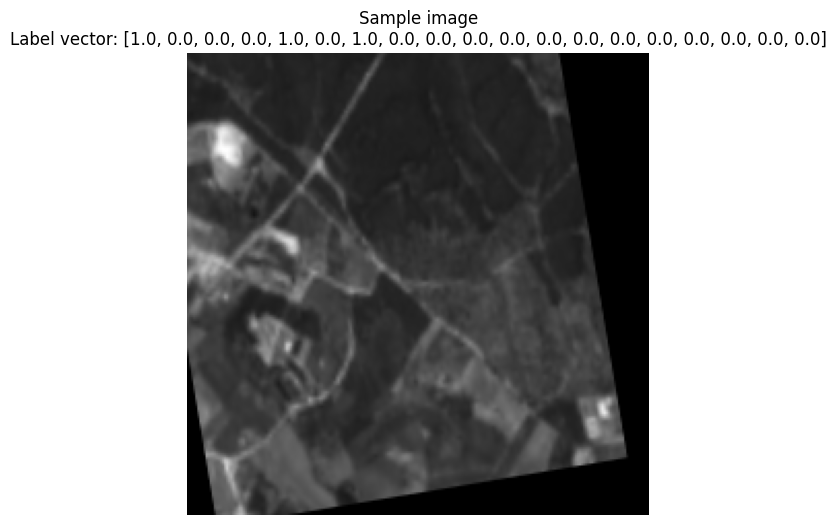

ViT Hybrid fixed: 3-band input, 19-class output (pretrained weights kept).
Type image: <class 'torch.Tensor'>, shape: torch.Size([1, 224, 224]), dtype: torch.float32
Type label: <class 'torch.Tensor'>, shape: torch.Size([19]), dtype: torch.float32


Training:   0%|          | 0/561 [00:00<?, ?batch/s]/tmp/ipykernel_5218/1409831308.py:186: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(labels, dtype=torch.float32).to(device)
Validating:   0%|          | 0/121 [00:00<?, ?batch/s]/tmp/ipykernel_5218/1409831308.py:207: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(labels, dtype=torch.float32).to(device)
Validating: 100%|██████████| 121/121 [01:32<00:00,  1.31batch/s]


Epoch 1/10: Train Loss = 0.1924, Val Loss = 0.1708
✅ Saved best model (val_loss=0.1708)


Validating: 100%|██████████| 121/121 [01:27<00:00,  1.39batch/s]


Epoch 2/10: Train Loss = 0.1628, Val Loss = 0.1592
✅ Saved best model (val_loss=0.1592)


Validating: 100%|██████████| 121/121 [01:24<00:00,  1.43batch/s]


Epoch 3/10: Train Loss = 0.1548, Val Loss = 0.1509
✅ Saved best model (val_loss=0.1509)


Validating: 100%|██████████| 121/121 [01:27<00:00,  1.39batch/s]


Epoch 4/10: Train Loss = 0.1486, Val Loss = 0.1526
🔴 EarlyStopping counter: 1/3


Validating: 100%|██████████| 121/121 [01:24<00:00,  1.43batch/s]


Epoch 5/10: Train Loss = 0.1437, Val Loss = 0.1473
✅ Saved best model (val_loss=0.1473)


Validating: 100%|██████████| 121/121 [01:25<00:00,  1.42batch/s]


Epoch 6/10: Train Loss = 0.1258, Val Loss = 0.1405
✅ Saved best model (val_loss=0.1405)


Validating: 100%|██████████| 121/121 [01:28<00:00,  1.37batch/s]


Epoch 7/10: Train Loss = 0.1153, Val Loss = 0.1421
🔴 EarlyStopping counter: 1/3


Validating: 100%|██████████| 121/121 [01:26<00:00,  1.40batch/s]


Epoch 8/10: Train Loss = 0.1031, Val Loss = 0.1443
🔴 EarlyStopping counter: 2/3


Validating: 100%|██████████| 121/121 [01:25<00:00,  1.42batch/s]


Epoch 9/10: Train Loss = 0.0887, Val Loss = 0.1508
🔴 EarlyStopping counter: 3/3
🛑 Early stopping triggered!
⚡ Using device: cuda
Output sigmoid:
 [2.52631176e-02 6.21147745e-04 1.50272623e-03 2.34042504e-03
 3.30744684e-03 5.82046981e-04 6.13537384e-04 8.19520850e-04
 9.41599021e-04 1.87454224e-02 3.11686188e-01 4.51207068e-03
 1.01143436e-04 7.47404119e-04 1.64831101e-04 3.66095373e-05
 7.60159455e-05 5.78052422e-05 9.12283649e-05]
Predicted Labels:
 [False False False False False False False False False False False False
 False False False False False False False]
Macro Precision: 0.814765, Recall: 0.669991, F1: 0.727822
Micro Precision: 0.833519, Recall: 0.750899, F1: 0.790055
mAP (macro): 0.806414

 Classification Report:
                                                                                        precision    recall  f1-score   support

                                                                           Arable land   0.893562  0.864152  0.878611      6441
       

In [48]:
# BAND 3
train(2)

Label Tensor: tensor([1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.])
Shape: torch.Size([19])
Non-zero class indices: [0, 4, 6]
Non-zero class count: 3.0


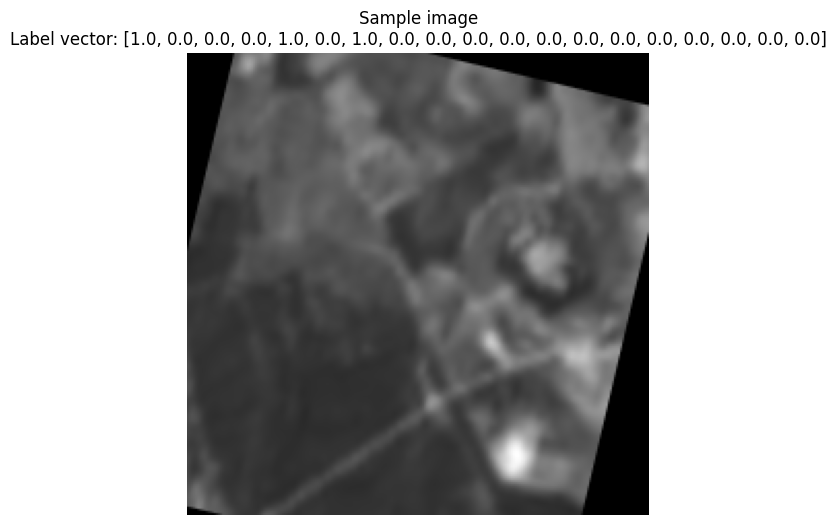

ViT Hybrid fixed: 3-band input, 19-class output (pretrained weights kept).
Type image: <class 'torch.Tensor'>, shape: torch.Size([1, 224, 224]), dtype: torch.float32
Type label: <class 'torch.Tensor'>, shape: torch.Size([19]), dtype: torch.float32


Training:   0%|          | 0/561 [00:00<?, ?batch/s]/tmp/ipykernel_5218/1409831308.py:186: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(labels, dtype=torch.float32).to(device)
Validating:   0%|          | 0/121 [00:00<?, ?batch/s]/tmp/ipykernel_5218/1409831308.py:207: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(labels, dtype=torch.float32).to(device)
Validating: 100%|██████████| 121/121 [01:30<00:00,  1.34batch/s]


Epoch 1/10: Train Loss = 0.2107, Val Loss = 0.1770
✅ Saved best model (val_loss=0.1770)


Validating: 100%|██████████| 121/121 [01:25<00:00,  1.42batch/s]


Epoch 2/10: Train Loss = 0.1753, Val Loss = 0.1692
✅ Saved best model (val_loss=0.1692)


Validating: 100%|██████████| 121/121 [01:25<00:00,  1.42batch/s]


Epoch 3/10: Train Loss = 0.1673, Val Loss = 0.1658
✅ Saved best model (val_loss=0.1658)


Validating: 100%|██████████| 121/121 [01:28<00:00,  1.37batch/s]


Epoch 4/10: Train Loss = 0.1613, Val Loss = 0.1632
✅ Saved best model (val_loss=0.1632)


Validating: 100%|██████████| 121/121 [01:35<00:00,  1.26batch/s]


Epoch 5/10: Train Loss = 0.1558, Val Loss = 0.1583
✅ Saved best model (val_loss=0.1583)


Validating: 100%|██████████| 121/121 [01:29<00:00,  1.35batch/s]


Epoch 6/10: Train Loss = 0.1387, Val Loss = 0.1508
✅ Saved best model (val_loss=0.1508)


Validating: 100%|██████████| 121/121 [01:29<00:00,  1.35batch/s]


Epoch 7/10: Train Loss = 0.1294, Val Loss = 0.1546
🔴 EarlyStopping counter: 1/3


Validating: 100%|██████████| 121/121 [01:28<00:00,  1.36batch/s]


Epoch 8/10: Train Loss = 0.1189, Val Loss = 0.1537
🔴 EarlyStopping counter: 2/3


Validating: 100%|██████████| 121/121 [01:28<00:00,  1.37batch/s]


Epoch 9/10: Train Loss = 0.1053, Val Loss = 0.1628
🔴 EarlyStopping counter: 3/3
🛑 Early stopping triggered!
⚡ Using device: cuda
Output sigmoid:
 [3.3707346e-03 2.0246799e-03 5.6399936e-03 2.9232858e-03 8.8179938e-04
 3.6977199e-04 4.9373507e-04 6.6178228e-04 5.4395007e-04 1.1159669e-03
 8.1959814e-01 3.5120840e-03 8.8916376e-04 1.4347312e-04 1.2985885e-04
 3.8631657e-05 1.1625221e-04 5.0883180e-05 8.6629843e-06]
Predicted Labels:
 [False False False False False False False False False False  True False
 False False False False False False False]
Macro Precision: 0.792893, Recall: 0.632087, F1: 0.693678
Micro Precision: 0.825471, Recall: 0.725155, F1: 0.772068
mAP (macro): 0.774788

 Classification Report:
                                                                                        precision    recall  f1-score   support

                                                                           Arable land   0.859401  0.877814  0.868510      6441
                           

In [49]:
# BAND 5
train(4)

Label Tensor: tensor([1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.])
Shape: torch.Size([19])
Non-zero class indices: [0, 4, 6]
Non-zero class count: 3.0


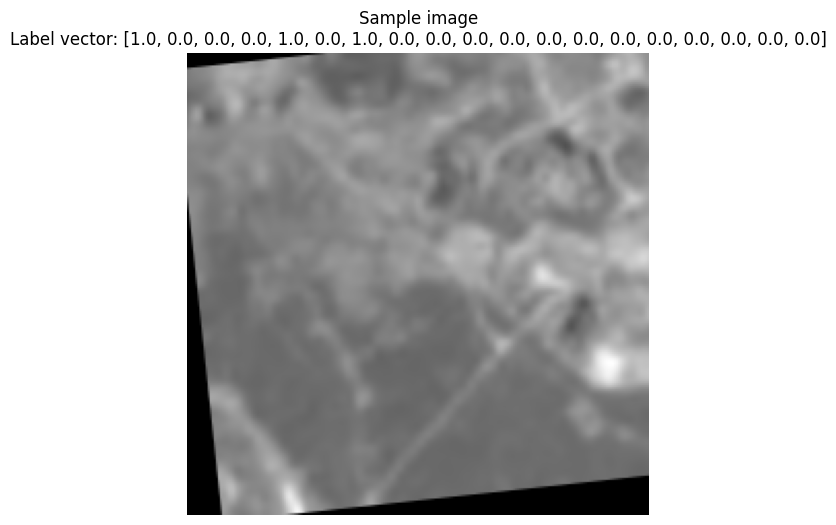

ViT Hybrid fixed: 3-band input, 19-class output (pretrained weights kept).
Type image: <class 'torch.Tensor'>, shape: torch.Size([1, 224, 224]), dtype: torch.float32
Type label: <class 'torch.Tensor'>, shape: torch.Size([19]), dtype: torch.float32


Training:   0%|          | 0/561 [00:00<?, ?batch/s]/tmp/ipykernel_5218/1409831308.py:186: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(labels, dtype=torch.float32).to(device)
Validating:   0%|          | 0/121 [00:00<?, ?batch/s]/tmp/ipykernel_5218/1409831308.py:207: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(labels, dtype=torch.float32).to(device)
Validating: 100%|██████████| 121/121 [01:33<00:00,  1.30batch/s]


Epoch 1/10: Train Loss = 0.2234, Val Loss = 0.1945
✅ Saved best model (val_loss=0.1945)


Validating: 100%|██████████| 121/121 [01:24<00:00,  1.43batch/s]


Epoch 2/10: Train Loss = 0.1885, Val Loss = 0.1847
✅ Saved best model (val_loss=0.1847)


Validating: 100%|██████████| 121/121 [01:26<00:00,  1.40batch/s]


Epoch 3/10: Train Loss = 0.1790, Val Loss = 0.1709
✅ Saved best model (val_loss=0.1709)


Validating: 100%|██████████| 121/121 [01:28<00:00,  1.36batch/s]


Epoch 4/10: Train Loss = 0.1713, Val Loss = 0.1697
✅ Saved best model (val_loss=0.1697)


Validating: 100%|██████████| 121/121 [01:28<00:00,  1.37batch/s]


Epoch 5/10: Train Loss = 0.1667, Val Loss = 0.1682
✅ Saved best model (val_loss=0.1682)


Validating: 100%|██████████| 121/121 [01:27<00:00,  1.38batch/s]


Epoch 6/10: Train Loss = 0.1482, Val Loss = 0.1591
✅ Saved best model (val_loss=0.1591)


Validating: 100%|██████████| 121/121 [01:27<00:00,  1.39batch/s]


Epoch 7/10: Train Loss = 0.1392, Val Loss = 0.1585
🔴 EarlyStopping counter: 1/3


Validating: 100%|██████████| 121/121 [01:28<00:00,  1.36batch/s]


Epoch 8/10: Train Loss = 0.1297, Val Loss = 0.1582
🔴 EarlyStopping counter: 2/3


Validating: 100%|██████████| 121/121 [01:29<00:00,  1.34batch/s]


Epoch 9/10: Train Loss = 0.1176, Val Loss = 0.1658
🔴 EarlyStopping counter: 3/3
🛑 Early stopping triggered!
⚡ Using device: cuda
Output sigmoid:
 [2.7224500e-02 4.9848165e-03 9.9428240e-03 1.1284084e-02 2.3345061e-02
 6.9366177e-03 1.1750036e-03 1.3531768e-03 3.5138184e-03 6.1071524e-03
 4.4023417e-02 1.7380954e-03 1.9691086e-03 1.4995404e-04 3.1692843e-04
 4.9638598e-05 4.5357470e-04 2.0218611e-04 4.0878513e-05]
Predicted Labels:
 [False False False False False False False False False False False False
 False False False False False False False]
Macro Precision: 0.770184, Recall: 0.608955, F1: 0.666437
Micro Precision: 0.806675, Recall: 0.711489, F1: 0.756098
mAP (macro): 0.751927

 Classification Report:
                                                                                        precision    recall  f1-score   support

                                                                           Arable land   0.842872  0.861978  0.852318      6441
                           

In [50]:
# BAND 7
train(6)

Label Tensor: tensor([1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.])
Shape: torch.Size([19])
Non-zero class indices: [0, 4, 6]
Non-zero class count: 3.0


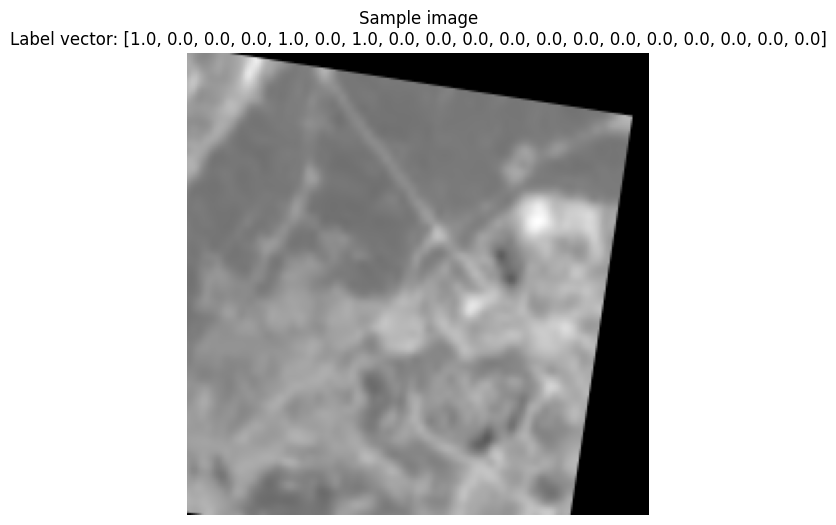

ViT Hybrid fixed: 3-band input, 19-class output (pretrained weights kept).
Type image: <class 'torch.Tensor'>, shape: torch.Size([1, 224, 224]), dtype: torch.float32
Type label: <class 'torch.Tensor'>, shape: torch.Size([19]), dtype: torch.float32


Training:   0%|          | 0/561 [00:00<?, ?batch/s]/tmp/ipykernel_5218/1409831308.py:186: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(labels, dtype=torch.float32).to(device)
Validating:   0%|          | 0/121 [00:00<?, ?batch/s]/tmp/ipykernel_5218/1409831308.py:207: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(labels, dtype=torch.float32).to(device)
Validating: 100%|██████████| 121/121 [01:29<00:00,  1.36batch/s]


Epoch 1/10: Train Loss = 0.2260, Val Loss = 0.2012
✅ Saved best model (val_loss=0.2012)


Validating: 100%|██████████| 121/121 [01:26<00:00,  1.40batch/s]


Epoch 2/10: Train Loss = 0.1903, Val Loss = 0.1794
✅ Saved best model (val_loss=0.1794)


Validating: 100%|██████████| 121/121 [01:28<00:00,  1.37batch/s]


Epoch 3/10: Train Loss = 0.1799, Val Loss = 0.1705
✅ Saved best model (val_loss=0.1705)


Validating: 100%|██████████| 121/121 [01:25<00:00,  1.42batch/s]


Epoch 4/10: Train Loss = 0.1721, Val Loss = 0.1748
🔴 EarlyStopping counter: 1/3


Validating: 100%|██████████| 121/121 [01:28<00:00,  1.37batch/s]


Epoch 5/10: Train Loss = 0.1674, Val Loss = 0.1722
🔴 EarlyStopping counter: 2/3


Validating: 100%|██████████| 121/121 [01:28<00:00,  1.37batch/s]


Epoch 6/10: Train Loss = 0.1484, Val Loss = 0.1588
✅ Saved best model (val_loss=0.1588)


Validating: 100%|██████████| 121/121 [01:26<00:00,  1.39batch/s]


Epoch 7/10: Train Loss = 0.1393, Val Loss = 0.1589
🔴 EarlyStopping counter: 1/3


Validating: 100%|██████████| 121/121 [01:28<00:00,  1.37batch/s]


Epoch 8/10: Train Loss = 0.1303, Val Loss = 0.1591
🔴 EarlyStopping counter: 2/3


Validating: 100%|██████████| 121/121 [01:27<00:00,  1.38batch/s]


Epoch 9/10: Train Loss = 0.1186, Val Loss = 0.1638
🔴 EarlyStopping counter: 3/3
🛑 Early stopping triggered!
⚡ Using device: cuda
Output sigmoid:
 [1.1091898e-02 1.4160646e-02 9.9272327e-03 3.0082590e-03 1.6779911e-02
 1.7733105e-03 5.5993290e-04 2.0448179e-03 5.9146452e-04 9.7302540e-04
 8.1759912e-01 1.2943440e-03 2.3940427e-03 1.0679454e-04 2.1333131e-04
 9.5474898e-05 3.4842998e-04 1.6321318e-04 2.0003392e-05]
Predicted Labels:
 [False False False False False False False False False False  True False
 False False False False False False False]
Macro Precision: 0.772691, Recall: 0.619543, F1: 0.681296
Micro Precision: 0.810571, Recall: 0.711139, F1: 0.757606
mAP (macro): 0.760360

 Classification Report:
                                                                                        precision    recall  f1-score   support

                                                                           Arable land   0.901381  0.790405  0.842253      6441
                           

In [51]:
# BAND 9
train(8)

Label Tensor: tensor([1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.])
Shape: torch.Size([19])
Non-zero class indices: [0, 4, 6]
Non-zero class count: 3.0


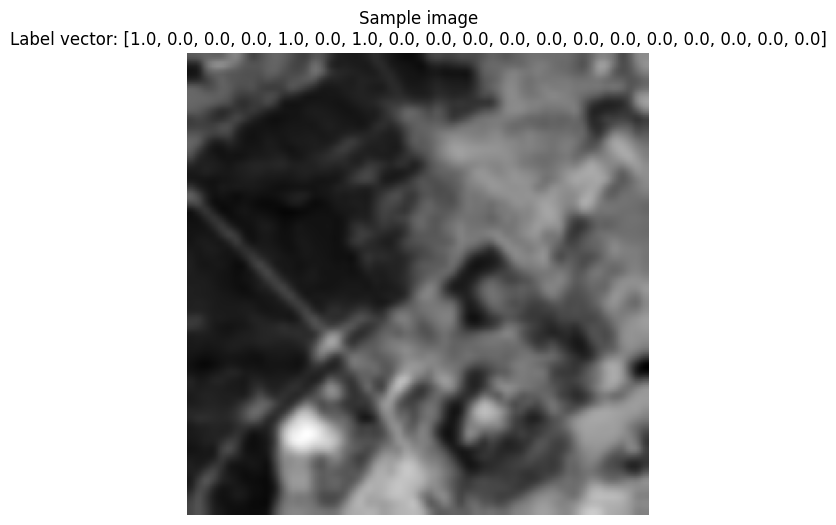

ViT Hybrid fixed: 3-band input, 19-class output (pretrained weights kept).
Type image: <class 'torch.Tensor'>, shape: torch.Size([1, 224, 224]), dtype: torch.float32
Type label: <class 'torch.Tensor'>, shape: torch.Size([19]), dtype: torch.float32


Training:   0%|          | 0/561 [00:00<?, ?batch/s]/tmp/ipykernel_5218/1409831308.py:186: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(labels, dtype=torch.float32).to(device)
Validating:   0%|          | 0/121 [00:00<?, ?batch/s]/tmp/ipykernel_5218/1409831308.py:207: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(labels, dtype=torch.float32).to(device)
Validating: 100%|██████████| 121/121 [01:28<00:00,  1.36batch/s]


Epoch 1/10: Train Loss = 0.2153, Val Loss = 0.1753
✅ Saved best model (val_loss=0.1753)


Validating: 100%|██████████| 121/121 [01:30<00:00,  1.34batch/s]


Epoch 2/10: Train Loss = 0.1775, Val Loss = 0.1722
✅ Saved best model (val_loss=0.1722)


Validating: 100%|██████████| 121/121 [01:27<00:00,  1.38batch/s]


Epoch 3/10: Train Loss = 0.1700, Val Loss = 0.1649
✅ Saved best model (val_loss=0.1649)


Validating: 100%|██████████| 121/121 [01:29<00:00,  1.36batch/s]


Epoch 4/10: Train Loss = 0.1635, Val Loss = 0.1623
✅ Saved best model (val_loss=0.1623)


Validating: 100%|██████████| 121/121 [01:26<00:00,  1.39batch/s]


Epoch 5/10: Train Loss = 0.1581, Val Loss = 0.1697
🔴 EarlyStopping counter: 1/3


Validating: 100%|██████████| 121/121 [01:26<00:00,  1.40batch/s]


Epoch 6/10: Train Loss = 0.1417, Val Loss = 0.1495
✅ Saved best model (val_loss=0.1495)


Validating: 100%|██████████| 121/121 [01:28<00:00,  1.37batch/s]


Epoch 7/10: Train Loss = 0.1336, Val Loss = 0.1501
🔴 EarlyStopping counter: 1/3


Validating: 100%|██████████| 121/121 [01:27<00:00,  1.38batch/s]


Epoch 8/10: Train Loss = 0.1240, Val Loss = 0.1518
🔴 EarlyStopping counter: 2/3


Validating: 100%|██████████| 121/121 [01:29<00:00,  1.35batch/s]


Epoch 9/10: Train Loss = 0.1122, Val Loss = 0.1552
🔴 EarlyStopping counter: 3/3
🛑 Early stopping triggered!
⚡ Using device: cuda
Output sigmoid:
 [3.2969836e-02 5.9349336e-02 2.6550619e-02 6.9234259e-03 8.8373041e-03
 8.3999842e-04 3.8283209e-03 2.5078978e-03 5.3065037e-03 7.8479024e-03
 2.9555023e-02 3.8625162e-02 1.3185750e-03 7.4694079e-05 8.1980434e-05
 3.1236777e-05 2.2156716e-04 1.9261040e-04 2.0191044e-05]
Predicted Labels:
 [False False False False False False False False False False False False
 False False False False False False False]
Macro Precision: 0.793836, Recall: 0.630934, F1: 0.694739
Micro Precision: 0.827929, Recall: 0.721184, F1: 0.770879
mAP (macro): 0.772954

 Classification Report:
                                                                                        precision    recall  f1-score   support

                                                                           Arable land   0.885966  0.857631  0.871568      6441
                           

In [52]:
# BAND 11
train(10)